In [2]:
import numpy as np
import pandas as pd 
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pyts.image import GramianAngularField

## 1 Import accelerometry data and subjects' sequence number (ID)

First, we load the following data:
- **matrix_3d.npy**: 3D matrix of accelerometry data. See 6_generate_time_series_matrix.ipynb for details.
- **matrix_SEQN.csv**: Sequence number (SEQN) of subjects in the same order as the rows of the 3D matrix. See 6_generate_time_series_matrix.ipynb for details.
- **train_ids.csv**: Sequence number of subjects in the training set.
- **test_ids.csv**: Sequence number of subjects in the test set.

In [4]:
physical_activity = np.load('../matrix_3d.npy')
subjects_seqn = pd.read_csv('../matrix_SEQN.csv')
train_ids = pd.read_csv('../train_IDs.csv', names=['SEQN'])
test_ids = pd.read_csv('../test_IDs.csv', names=['SEQN'])

In [5]:
physical_activity.shape # nof_subjects, 7 days, 1440 minutes

(7537, 7, 1440)

In [10]:
nof_subjects = physical_activity.shape[0] # 7537 subjects
nof_days = physical_activity.shape[1] # 7 days
nof_minutes_per_day = physical_activity.shape[2] # 1440 minutes

In [6]:
subjects_seqn.shape # nof_subjects

(7537, 1)

We have therefore the SEQN values that identify each subject. To identify the subject in the 3D matrix, we need to map those SEQN values to the row index of the 3D matrix. To do so, the following dictionary is created:

In [7]:
seqn_to_index = {seqn: idx for idx, seqn in enumerate(subjects_seqn['SEQN'].values)} # A dictionary to map SEQN to index

Testing dictionary

In [6]:
seqn_to_index

{73557.0: 0,
 73558.0: 1,
 73559.0: 2,
 73560.0: 3,
 73561.0: 4,
 73562.0: 5,
 73564.0: 6,
 73566.0: 7,
 73567.0: 8,
 73568.0: 9,
 73570.0: 10,
 73571.0: 11,
 73572.0: 12,
 73573.0: 13,
 73574.0: 14,
 73576.0: 15,
 73579.0: 16,
 73580.0: 17,
 73581.0: 18,
 73583.0: 19,
 73585.0: 20,
 73586.0: 21,
 73587.0: 22,
 73588.0: 23,
 73589.0: 24,
 73591.0: 25,
 73592.0: 26,
 73594.0: 27,
 73595.0: 28,
 73596.0: 29,
 73597.0: 30,
 73598.0: 31,
 73599.0: 32,
 73600.0: 33,
 73602.0: 34,
 73603.0: 35,
 73604.0: 36,
 73605.0: 37,
 73606.0: 38,
 73607.0: 39,
 73608.0: 40,
 73609.0: 41,
 73610.0: 42,
 73612.0: 43,
 73613.0: 44,
 73614.0: 45,
 73615.0: 46,
 73616.0: 47,
 73617.0: 48,
 73618.0: 49,
 73619.0: 50,
 73620.0: 51,
 73621.0: 52,
 73622.0: 53,
 73623.0: 54,
 73624.0: 55,
 73626.0: 56,
 73628.0: 57,
 73629.0: 58,
 73630.0: 59,
 73631.0: 60,
 73632.0: 61,
 73633.0: 62,
 73635.0: 63,
 73638.0: 64,
 73639.0: 65,
 73640.0: 66,
 73642.0: 67,
 73643.0: 68,
 73644.0: 69,
 73645.0: 70,
 73646.0: 71,
 7

train_ids y test_ids contain the SEQN of the subjects in the training and testing set, respectively. 

In [16]:
train_ids['SEQN'].iloc[0]

73729.0

seqn_to_index is a dictionary that maps the SEQN to the index of the subject in the data matrix.

In [17]:
seqn_to_index[train_ids['SEQN'].iloc[0]]

136

subjects_seqn is a list with the SEQN of the subjects in the data matrix in the order they appear in the data matrix.

In [15]:
subjects_seqn['SEQN'].iloc[136]

73729.0

Would it be better to have physical_activity and subjects_seqn in a single data structure such as a dictionary or a class?

## 2 Functions

In [37]:
def create_gaf_image(one_day_acc):
    """
    Creates a 2D GAF image from the accelerometry data of a single day, for a single subject (input in a 2d numpy array).
    """
    gaf_model = GramianAngularField(method='difference')
    gaf = gaf_model.fit_transform(one_day_acc)
    if gaf.ndim == 3:  # If the output is 3D, reduce it to 2D
        return gaf.squeeze(0)  # Assume the shape is (1, height, width) and we need (height, width)
    return gaf

In [38]:
def plot_gaf_image(gaf_image):
    """
    This function plots a GAF image
    """
    fig_w=4; fig_h=4;# figure width and height
    plt.figure(figsize=(fig_w, fig_h))
    #plt.imshow(gaf_image[0], cmap='rainbow', origin='lower')
    plt.imshow(gaf_image, cmap='rainbow', origin='lower')
    plt.axis('off')
    plt.show()

When setting up an image in a graphical environment where you specify the figure size in inches and the resolution in dpi (dots per inch), the formula to calculate the number of pixels in each dimension of the image is:

- pixels = inches × dpi

- Width in Pixels: Width in inches × DPI
- Height in Pixels: Height in inches × DPI

- Resolution of the image: Width in Pixels x Height in Pixels

To create images with a specific pixel dimension, you need to consider both the `figsize` in inches and the `dpi` (dots per inch) setting when saving the image using `matplotlib`. 
Given this relationship, you can set the `figsize` and `dpi` such that their product results in the desired pixel dimensions.

Example
If you have an image size of 4 inches by 3 inches and a dpi of 300, then:

- Width in Pixels: 4 inches × 300 dpi=1200 pixels
- Height in Pixels: 3 inches × 300 dpi=900 pixels
This means the resolution of your image will be 1200 pixels wide by 900 pixels high.

If each day has 1440 minutes, I could try setting the resolution to 1 pixel per minute. This way, the image would have the same dimensions as the number of minutes in a day. So pixel = inches x dpi = 1440 pixels. This could be achieved for example with a `figsize` of 20 inches and a `dpi` of 72. --> Wrong. Files too large

In [39]:
def save_gaf_to_jpg(gaf_image, title):
    """
    Saves a GAF image to JPG.
    """
    if gaf_image.ndim == 3:  # In case the image still comes in 3D
        gaf_image = gaf_image.squeeze(0)  # Squeeze out the single-frame dimension if necessary

    height, width = gaf_image.shape
    fig_height = 4  # Height in inches
    fig_width = fig_height * (width / height)  # Width in inches, adjusted to maintain aspect ratio

    plt.figure(figsize=(fig_width, fig_height))
    plt.imshow(gaf_image, cmap='rainbow', origin='lower')
    plt.axis('off')
    plt.savefig(title, bbox_inches='tight', pad_inches=0, dpi=60)
    plt.close()

## 3 Creating the GAF images from the time series data

### 3a) An image for each subject and each day, stored in a jpg file

In [40]:
def process_subjects(subject_ids, physical_activity, prefix):
    for seqn in subject_ids['SEQN']:
        subject_idx = seqn_to_index[seqn]
        for day_idx in range(physical_activity.shape[1]):  # Assuming 7 days, you can use range(7) as well
            physical_activity_day = physical_activity[subject_idx, day_idx]
            gaf = create_gaf_image(physical_activity_day.reshape(1,nof_minutes_per_day)) # Reshape to 2D
        
            title = f'GAF_images/{prefix}_subject_{int(seqn)}_day_{day_idx}.jpg'
            save_gaf_to_jpg(gaf, title)

In [41]:
# Process training and testing sets
#process_subjects(train_ids, physical_activity, "train")
#process_subjects(test_ids, physical_activity, "test")
process_subjects(train_ids.head(1), physical_activity, "train")
process_subjects(test_ids.head(1), physical_activity, "test")

### 3b) An image for each subject concatenating all 7 days horizontally, stored in a jpg file

In [42]:

def process_subjects_one_week(subject_ids, physical_activity, prefix):
    """
    Process each subject and save a concatenated image of GAFs for a week.
    """
    for seqn in subject_ids['SEQN']:     #.head(1):  # Limiting for debugging
        subject_idx = seqn_to_index[seqn]
        weekly_gafs = []
        for day_idx in range(physical_activity.shape[1]):  # Assuming 7 days
            physical_activity_day = physical_activity[subject_idx, day_idx]
            gaf = create_gaf_image(physical_activity_day.reshape(1, nof_minutes_per_day))
            weekly_gafs.append(gaf)
        
        # Concatenate all GAF images horizontally
        full_week_gaf = np.hstack(weekly_gafs)
        
        # Save the concatenated image
        title = f'GAF_images/{prefix}_{int(seqn)}.jpg'
        save_gaf_to_jpg(full_week_gaf, title)


In [48]:
# Process training and testing sets
#process_subjects_one_week(train_ids, physical_activity, "train")
#process_subjects_one_week(test_ids, physical_activity, "test")
process_subjects_one_week(train_ids.head(1), physical_activity, "train")
process_subjects_one_week(test_ids.head(1), physical_activity, "test")

### 3c) Images are stored in a single tensor (npy file) of 3 dimensions: 
- [n_subjects, n_minutes_per_day:1440, n_minutes_per_week:1440x7=10080], 

so for each subject there is a single image with the 7 days concatenated.

In [49]:
def process_subjects_one_week_to_tensor(subject_ids, physical_activity, prefix):
    """
    Process each subject and store GAF images as tensors.
    """
    data_storage = []
    for seqn in subject_ids['SEQN']:
        subject_idx = seqn_to_index[seqn]
        weekly_gafs = []
        for day_idx in range(physical_activity.shape[1]):  # Assume 7 days
            physical_activity_day = physical_activity[subject_idx, day_idx]
            gaf = create_gaf_image(physical_activity_day.reshape(1, nof_minutes_per_day))
            weekly_gafs.append(gaf)
        
        # Stack all GAF images horizontally to form a week tensor
        full_week_gaf = np.hstack(weekly_gafs)
        data_storage.append(full_week_gaf)

    # Convert list to numpy array for more efficient storage and access
    data_storage = np.array(data_storage)
    np.save(f'{prefix}_gaf_data.npy', data_storage)  # Save as .npy file


In [50]:
# Process training and testing sets
#process_subjects_one_week_to_tensor(test_ids, physical_activity, "test")
#process_subjects_one_week_to_tensor(train_ids, physical_activity, "train")
process_subjects_one_week_to_tensor(test_ids.head(3), physical_activity, "test") # Limiting for debugging
process_subjects_one_week_to_tensor(train_ids.head(3), physical_activity, "train")

In [51]:
test_gaf_data = np.load('test_gaf_data.npy')

In [52]:
test_gaf_data.shape

(3, 1440, 10080)

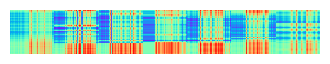

In [53]:
plot_gaf_image(test_gaf_data[0])

### 3d) Images are stored in a single tensor (npy file) of 4 dimensions: 
 - [n_subjects, n_minutes_per_day:1440, n_minutes_per_day:1440, days_per_week:7], 

so for each subject there is an image for each day of the week.

La GAF image no tiene 3 canales, sino 1 solo canal. Por lo tanto, no es necesario tener 1 dimension extra en el tensor para los canales RGB, y puedo usar la 4ta dimension para almacenar las imágenes de los días de la semana.

In [54]:
def process_subjects_one_week_to_4Dtensor(subject_ids, physical_activity, prefix):
    """
    Process each subject and store GAF images as tensors in the format:
    (number of subjects, number of points, number of points, 7 days).
    """
    data_storage = []
    for seqn in subject_ids['SEQN']:
        subject_idx = seqn_to_index[seqn]
        weekly_gafs = []
        for day_idx in range(physical_activity.shape[1]):  # Assuming physical_activity.shape[1] is 7
            physical_activity_day = physical_activity[subject_idx, day_idx]
            gaf = create_gaf_image(physical_activity_day.reshape(1, nof_minutes_per_day))
            weekly_gafs.append(gaf)
        
        # Stack all GAF images along a new axis to form a tensor for the week
        full_week_gaf = np.stack(weekly_gafs, axis=-1)
        data_storage.append(full_week_gaf)

    # Convert list to numpy array for more efficient storage and access
    data_storage = np.array(data_storage)
    np.save(f'{prefix}_gaf_4D.npy', data_storage)  # Save as .npy file



In [55]:
# Process training and testing sets
#process_subjects_one_week_to_4Dtensor(test_ids, physical_activity, "test")
#process_subjects_one_week_to_4Dtensor(train_ids, physical_activity, "train")
process_subjects_one_week_to_4Dtensor(test_ids.head(3), physical_activity, "test") # Limiting for debugging
process_subjects_one_week_to_4Dtensor(train_ids.head(3), physical_activity, "train") # Limiting for debugging

In [56]:
test_gaf_4D = np.load('test_gaf_4D.npy')

In [57]:
test_gaf_4D.shape

(3, 1440, 1440, 7)

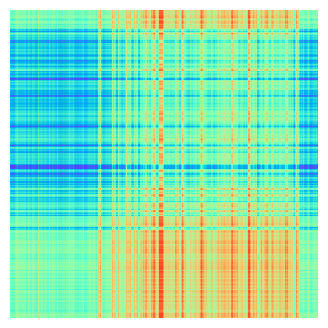

In [58]:
# Example: Plotting the GAF image for the first subject on the first day
subject_index = 0  # Index for the first subject
day_index = 0      # Index for the first day

# Select the GAF image for the first subject on the first day
gaf_image_example = test_gaf_4D[subject_index, :, :, day_index]

# Plot the selected GAF image
plot_gaf_image(gaf_image_example)

# TO DO: Tensors are in my opinion the best way to store the data. I can create the tensors and save them to disk. Then I can load them and use them to train the model. BUT the resulting npy files are too large and the computer hangs when creating them.

### Just checking how it looks

In [59]:
subject_idx = 100
day_idx = 4

In [60]:
physical_activity_day = physical_activity[subject_idx, day_idx]
gaf = create_gaf_image(physical_activity_day.reshape(1,nof_minutes_per_day)) # Reshape to 2D

In [62]:
# Define a custom tick formatter to map minute of the day to time of day
def time_formatter(x, pos):
    """
    Formatter function to convert minute of the day to HH:MM format.
    """
    hours = int(x // 60)
    minutes = int(x % 60)
    return f"{hours:02d}:{minutes:02d}"

def plot_subject_day_data(subject_idx, day_idx, matrix_3d, matrix_SEQN):
    """
    Plot the acceleration data for a specific subject and day, showing the SEQN in the title.
    
    Args:
    - subject_idx (int): Index of the subject in the matrix.
    - day_idx (int): Index of the day in the matrix (0-based, i.e., 0=Monday, 6=Sunday).
    - matrix_3d (numpy array): The 3D matrix containing acceleration data.
    - matrix_SEQN (pandas Series): Series containing the SEQN identifiers.
    """
    
    # Extract data for the given subject and day
    data = matrix_3d[subject_idx, day_idx]
    
    # Get the SEQN for the subject
    subject_SEQN = matrix_SEQN.iloc[subject_idx].item()  # Using .item() to get the value
    
    # Plot
    day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

    plt.figure(figsize=(12, 6))
    plt.plot(data)
    plt.title(f"Acceleration Data for Subject SEQN {subject_SEQN}, Day {day_idx} - {day_names[day_idx]}")
    plt.xlabel("Time of the Day")
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(time_formatter))
    plt.ylabel("Acceleration (PAXMTSM)")
    plt.grid(True)
    plt.show()


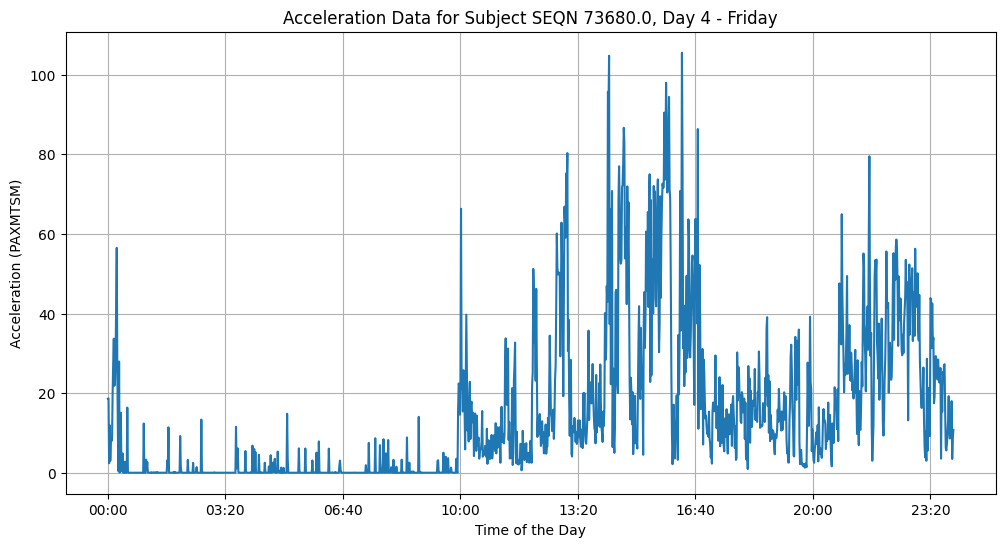

In [63]:
plot_subject_day_data(subject_idx, day_idx, physical_activity, subjects_seqn)

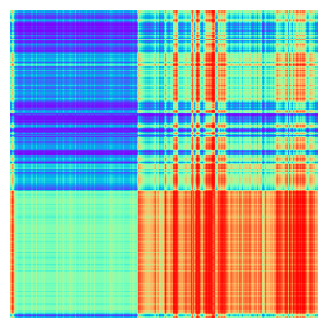

In [61]:
plot_gaf_image(gaf)
